In [1]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos
# Asegúrate de que el archivo esté en el mismo directorio o proporciona la ruta completa.
data = pd.read_csv('Mall_Customers.csv')

Primeras filas del dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Resumen estadístico:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


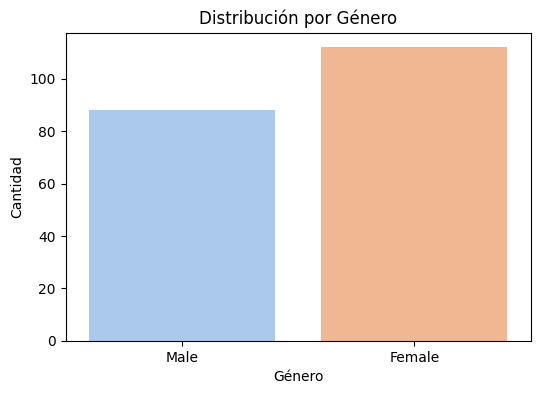

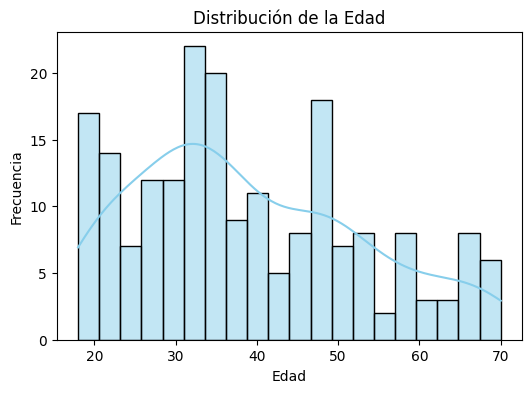

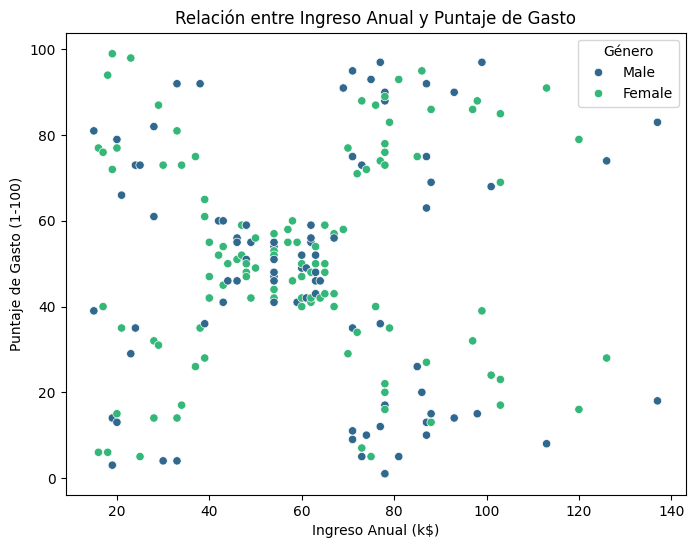

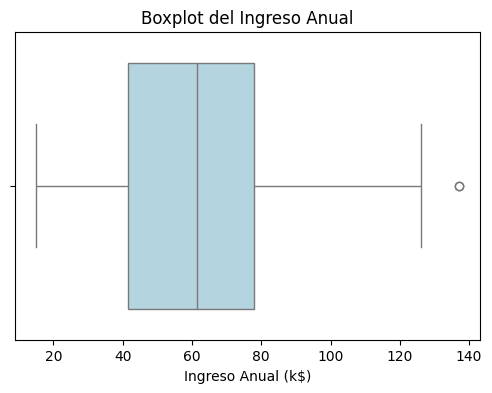

In [3]:
# Paso 1: Análisis exploratorio de los datos
# 1. Visualizar las primeras filas del dataset
print("Primeras filas del dataset:")
display(data.head())

# 2. Resumen estadístico de las variables numéricas
print("\nResumen estadístico:")
display(data.describe())

# 3. Visualización de distribuciones y relaciones
# 3.1. Distribución del Género
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', hue='Gender', dodge=False, palette='pastel', legend=False)
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

# 3.2. Distribución de la Edad
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='Age', kde=True, color='skyblue', bins=20)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# 3.3. Relación entre Ingreso Anual y Puntaje de Gasto
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='viridis')
plt.title('Relación entre Ingreso Anual y Puntaje de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend(title='Género')
plt.show()

# 3.4. Detectar valores atípicos con boxplots
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Annual Income (k$)', color='lightblue')
plt.title('Boxplot del Ingreso Anual')
plt.xlabel('Ingreso Anual (k$)')
plt.show()

In [5]:
# Paso 2: Preprocesamiento de los datos

# 1. Verificar valores faltantes
print("Valores faltantes por columna:")
print(data.isnull().sum())

# 2. Verificar datos duplicados
print("\n¿Hay datos duplicados?")
print(data.duplicated().sum())

# 3. Eliminar columnas irrelevantes
# La columna CustomerID no es relevante para el análisis
data = data.drop(columns=['CustomerID'])

# 4. Codificar variables categóricas
# Convertimos la columna 'Gender' a valores numéricos: Male -> 0, Female -> 1
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# 5. Normalización de las columnas numéricas
from sklearn.preprocessing import MinMaxScaler

# Seleccionar columnas numéricas
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Aplicar MinMaxScaler para normalizar
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Verificar los datos preprocesados
print("\nDatos preprocesados:")
display(data.head())

Valores faltantes por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

¿Hay datos duplicados?
0

Datos preprocesados:


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0.019231,0.000000,0.387755
1,0,0.057692,0.000000,0.816327
2,1,0.038462,0.008197,0.051020
3,1,0.096154,0.008197,0.775510
4,1,0.250000,0.016393,0.397959


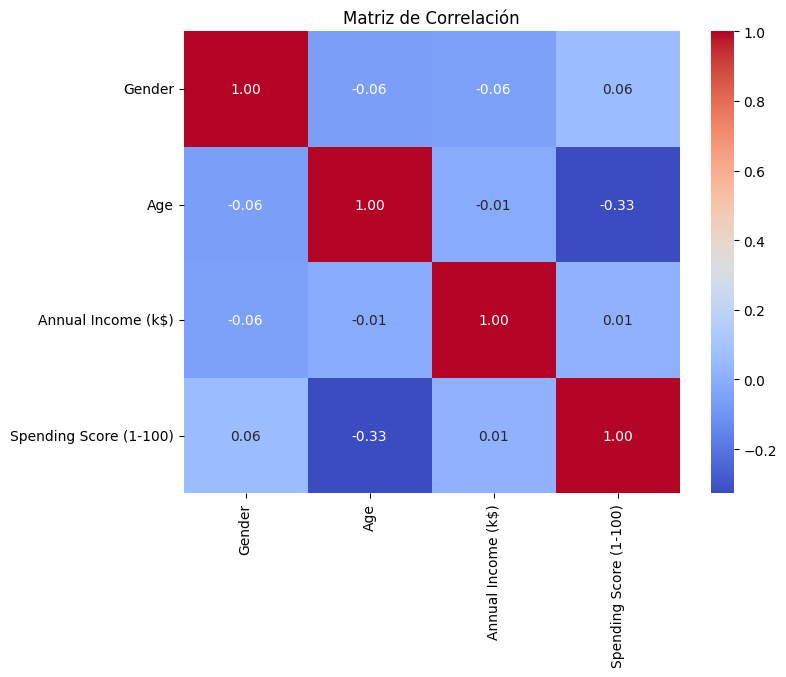


Correlaciones con la variable 'Spending Score (1-100)':
Spending Score (1-100)    1.000000
Gender                    0.058109
Annual Income (k$)        0.009903
Age                      -0.327227
Name: Spending Score (1-100), dtype: float64

Características seleccionadas para el modelo:
        Age  Annual Income (k$)  Spending Score (1-100)
0  0.019231            0.000000                0.387755
1  0.057692            0.000000                0.816327
2  0.038462            0.008197                0.051020
3  0.096154            0.008197                0.775510
4  0.250000            0.016393                0.397959


In [6]:
# Paso 3: Selección de características relevantes

# 1. Calcular la matriz de correlación
correlation_matrix = data.corr()

# 2. Visualizar la matriz de correlación
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Matriz de Correlación')
plt.show()

# 3. Seleccionar características basadas en correlación con Spending Score
print("\nCorrelaciones con la variable 'Spending Score (1-100)':")
correlation_with_target = correlation_matrix['Spending Score (1-100)'].sort_values(ascending=False)
print(correlation_with_target)

# 4. Elegir las características relevantes
# Mantendremos las variables con correlación significativa con Spending Score
selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']  # Ajustar según correlaciones
X = data[selected_features]

print("\nCaracterísticas seleccionadas para el modelo:")
print(X.head())

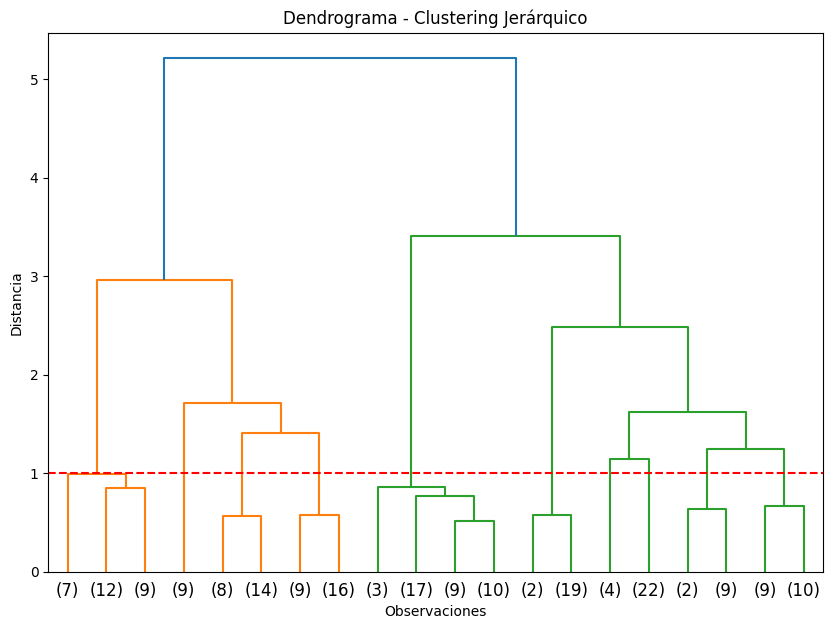

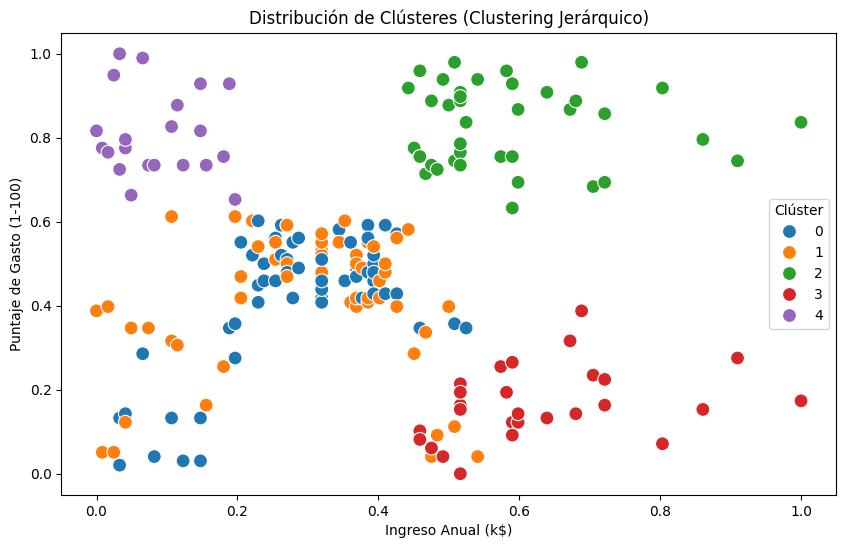


Dataset con los clústeres asignados:


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,0.019231,0.000000,0.387755,1
1,0,0.057692,0.000000,0.816327,4
2,1,0.038462,0.008197,0.051020,1
3,1,0.096154,0.008197,0.775510,4
4,1,0.250000,0.016393,0.397959,1


In [8]:
# Paso 4: Entrenamiento del modelo de clustering jerárquico

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 1. Generar el dendrograma para identificar el número óptimo de clústeres
plt.figure(figsize=(10, 7))
linked = linkage(X, method='ward')  # Usamos el método de Ward para minimizar la varianza
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.axhline(y=1.0, color='r', linestyle='--')  # Línea de referencia para seleccionar el número de clústeres
plt.show()

# 2. Entrenar el modelo de clustering jerárquico
# Basándonos en el dendrograma, seleccionaremos un número de clústeres (ajustar según resultado)
n_clusters = 5  # Ajustar según la interpretación del dendrograma
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
data['Cluster'] = model.fit_predict(X)

# 3. Visualizar la asignación de clústeres
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10', s=100)
plt.title('Distribución de Clústeres (Clustering Jerárquico)')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend(title='Clúster')
plt.show()

# Mostrar las primeras filas del dataset con los clústeres asignados
print("\nDataset con los clústeres asignados:")
display(data.head())

In [9]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# 1. Calcular el coeficiente de Silhouette
silhouette_avg = silhouette_score(X, data['Cluster'])
print(f"Coeficiente de Silhouette: {silhouette_avg:.4f}")

# 2. Calcular el índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(X, data['Cluster'])
print(f"Índice de Calinski-Harabasz: {calinski_harabasz:.4f}")

# 3. Interpretación del coeficiente de Silhouette
if silhouette_avg > 0.5:
    silhouette_quality = "buena"
elif silhouette_avg > 0.25:
    silhouette_quality = "moderada"
else:
    silhouette_quality = "baja"

print(f"\nInterpretación del coeficiente de Silhouette: La calidad de los clústeres es {silhouette_quality}.")

Coeficiente de Silhouette: 0.3955
Índice de Calinski-Harabasz: 123.9907

Interpretación del coeficiente de Silhouette: La calidad de los clústeres es moderada.



Resumen estadístico por clúster:


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.517857,0.731456,0.286300,0.416545
1,0.625000,0.205701,0.293765,0.416727
2,0.538462,0.282544,0.586381,0.827839
3,0.500000,0.497940,0.625293,0.159985
4,0.619048,0.130952,0.087041,0.808552


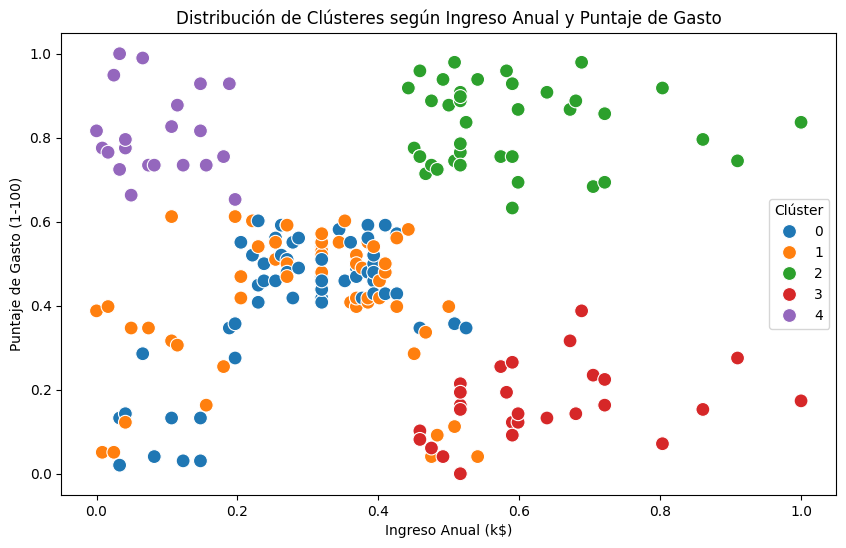

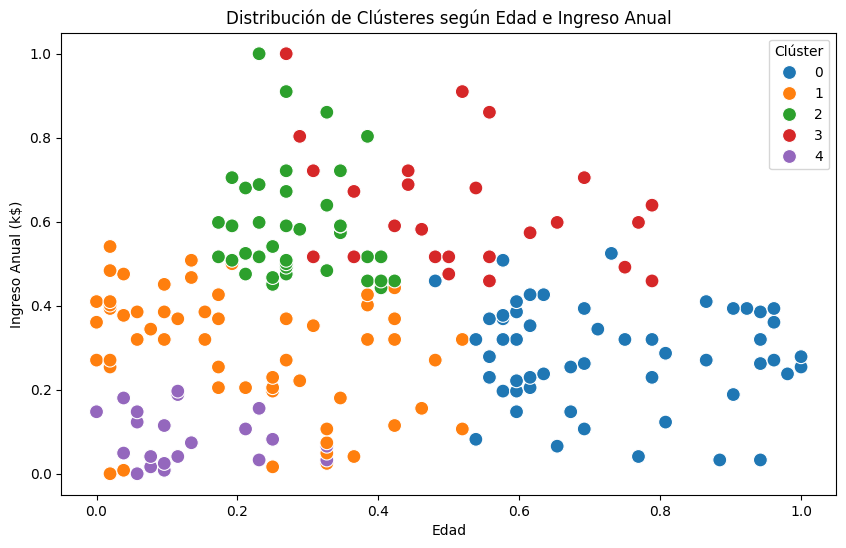


Cantidad de clientes por clúster:


Cluster
1    56
0    56
2    39
3    28
4    21
Name: count, dtype: int64

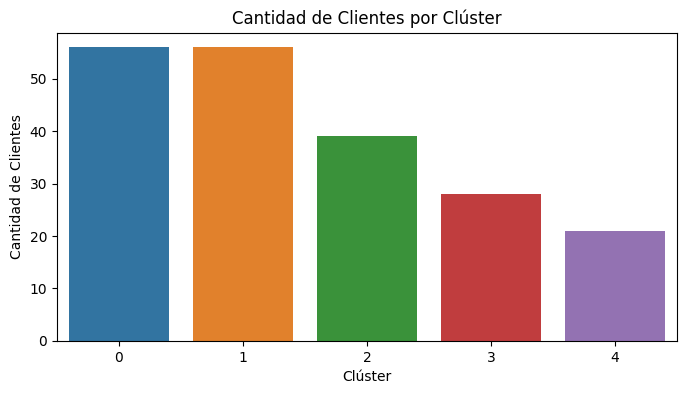

In [11]:
# Paso 6: Visualización y análisis detallado de los clústeres

# 1. Resumen estadístico por clúster
cluster_summary = data.groupby('Cluster').mean()

print("\nResumen estadístico por clúster:")
display(cluster_summary)

# 2. Visualización: Distribución de clústeres según características clave
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10', s=100)
plt.title('Distribución de Clústeres según Ingreso Anual y Puntaje de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend(title='Clúster')
plt.show()

# 3. Visualización adicional: Relación entre Edad e Ingreso Anual
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Annual Income (k$)', hue='Cluster', palette='tab10', s=100)
plt.title('Distribución de Clústeres según Edad e Ingreso Anual')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.legend(title='Clúster')
plt.show()

# 4. Conteo de clientes por clúster
cluster_counts = data['Cluster'].value_counts()

print("\nCantidad de clientes por clúster:")
display(cluster_counts)

# Gráfico de barras para el conteo de clientes
plt.figure(figsize=(8, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, dodge=False, palette='tab10', legend=False)
plt.title('Cantidad de Clientes por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Cantidad de Clientes')
plt.show()